In [9]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [5]:
def ell2bin (ell,spc):
    return np.floor((np.log(ell)/np.log(spc))).astype(int)

In [2]:
def count_triangles (bin_spacing =2, ell_min=20, ell_max=2000):
    Nt=0
    Noff = 5
    counts=np.zeros(Noff)
    for l1 in tqdm(np.arange(ell_min,ell_max)):
        l1bin = ell2bin(l1,bin_spacing)
        for l2 in np.arange(l1,ell_max):
            l2bin = ell2bin(l2,bin_spacing)
            # we avoid double counting the triangle configurations by insisting l1<=l2<=l3
            l3ar=np.arange(l2,min(l1+l2,ell_max))
            Nt+=len(l3ar)
            l3bins = ell2bin(l3ar,bin_spacing)
            mindiff = np.minimum(l2bin-l1bin,l3bins-l2bin)
            for i in range(Noff):
                counts[i]+=np.sum(mindiff<=i)
    return counts/Nt

In [6]:
step = [1.1,1.3, 1.5, 1.8, 2.0]
res = [count_triangles(s,ell_max=2000) for s in step]

  0%|          | 0/1980 [00:00<?, ?it/s]

  0%|          | 0/1980 [00:00<?, ?it/s]

  0%|          | 0/1980 [00:00<?, ?it/s]

  0%|          | 0/1980 [00:00<?, ?it/s]

  0%|          | 0/1980 [00:00<?, ?it/s]

(-0.5, 4.5)

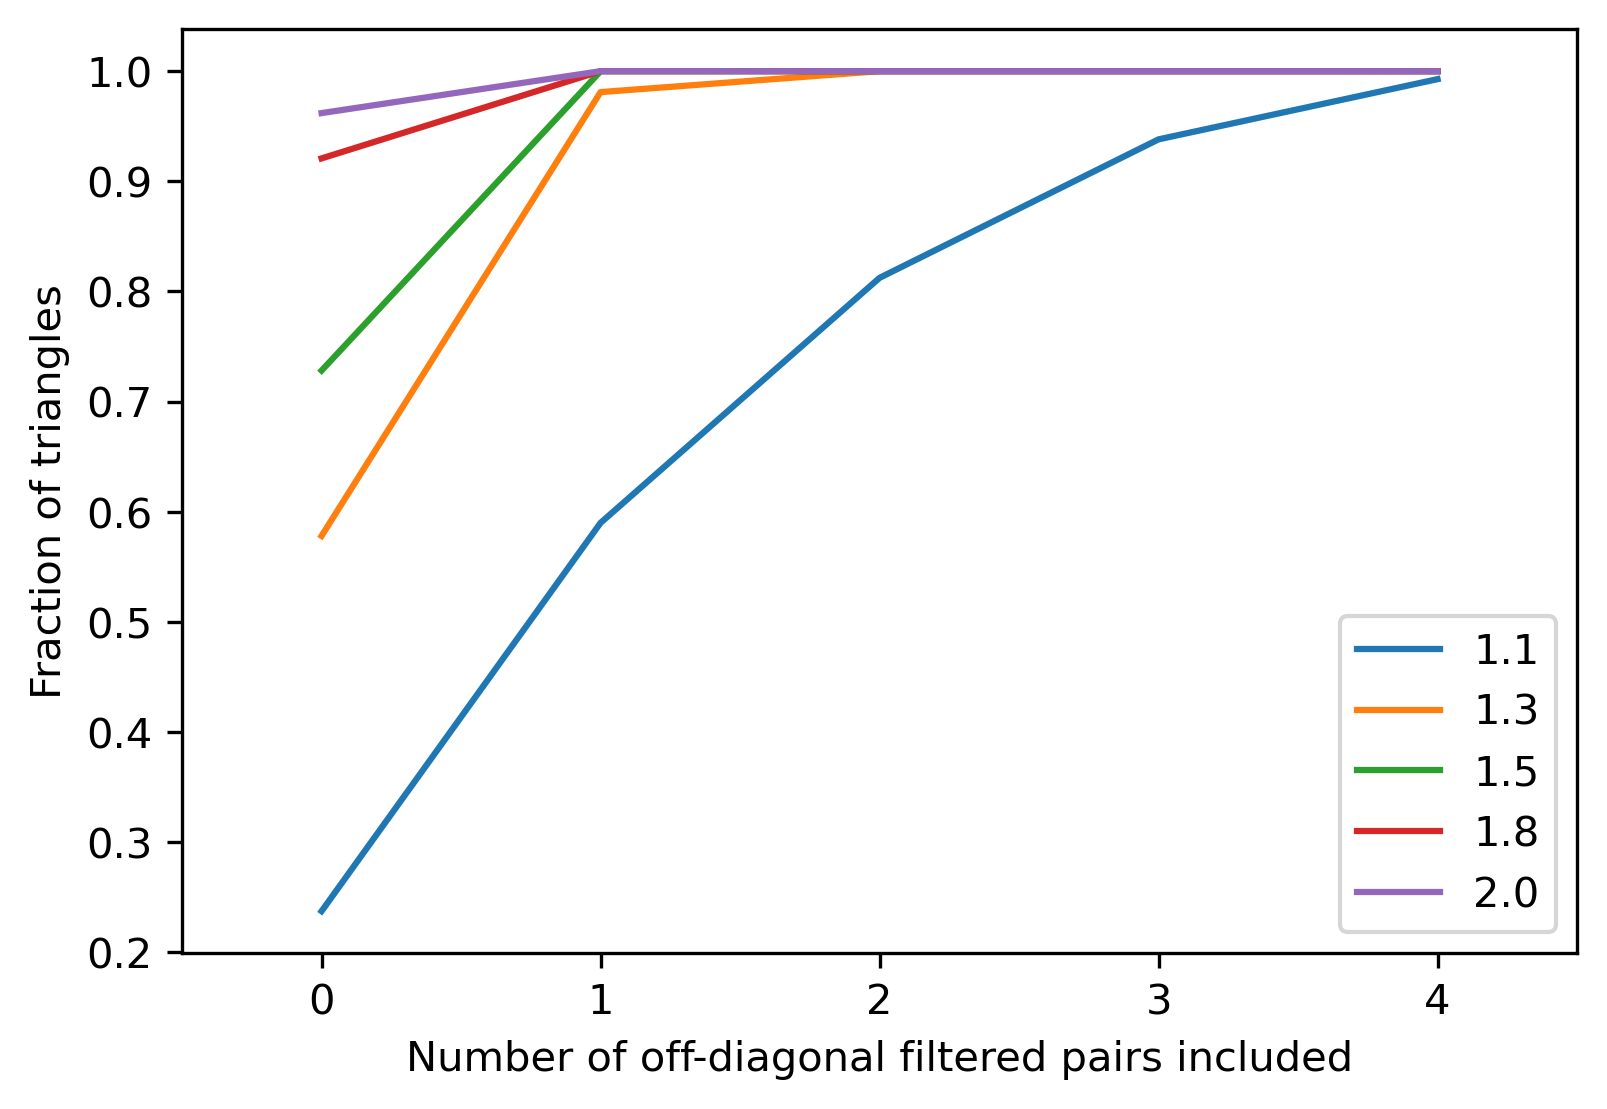

In [21]:
res = np.array(res)
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
for s,ar in zip(step,res):
    ax.plot(ar,label=s)
ax.legend()
ax.set_xlabel("Number of off-diagonal filtered pairs included")
ax.set_ylabel("Fraction of triangles")
ax.set_xlim(-0.5,4.5)